# **Information about of the data**

* **Location:** The common name of the location of the weather station. (String)
* **MinTemp:** The minimum temperature in degrees celsius.(Float)
* **MaxTemp:** The maximum temperature in degrees celsius.(Float)
* **Rainfall:** The amount of rainfall recorded for the day in mm.(Float)
* **Evaporation:** Evaporation is a type of vaporization that occurs on the surface of a liquid as it changes into the gas phase.(Float)
* **Sunshine:** The number of hours of bright sunshine in the day..(Float)
* **WindGustDir:** The direction of the strongest wind gust in the 24 hours to midnight.(String)
* **WindGustSpeed:** The speed (km/h) of the strongest wind gust in the 24 hours to midnight.(Float)
* **WindDir9am:** Wind direction at 9am.(String)
* **WindDir3pm:** Wind direction at 3pm.(String)
* **WindSpeed9am:** Wind speed (km/hr) averaged over 10 minutes prior to 9am.(Float)
* **WindSpeed3pm:** Wind speed (km/hr) averaged over 10 minutes prior to 3pm.(Float)
* **Humidity9am:** Relative humidity (percent) at 9am.(Float)
* **Humidity3pm:** Relative humidity (percent) at 3pm.(Float)
* **Pressure9am:** Atmospheric pressure (hpa) reduced to mean sea level at 9am.(Float)
* **Pressure3pm:** Atmospheric pressure (hpa) reduced to mean sea level at 3pm.(Float)
* **Cloud9am:** Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast..(Float)
* **Cloud3pm:** Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values.(Float)
* **Temp9am:** Temperature (degrees C) at 9am.(Float)
* **Temp3pm:** Temperature (degrees C) at 3pm.(Float)
* **RainToday:** Integer: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0.(Boolean)
* **RainTomorrow:** The target variable. Did it rain tomorrow.(Boolean)

# **Import Libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random # For random choice

import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Data visualization

from sklearn.preprocessing import MinMaxScaler # Transform features by scaling each feature to a given range.
from sklearn.model_selection import GridSearchCV # Exhaustive search over specified parameter values for an estimator.

from sklearn.tree import DecisionTreeClassifier # ML algorithm

import warnings # For turn off warnings
warnings.filterwarnings("ignore")

# **Data exploration**

In [2]:
train = pd.read_csv("train_weather.csv") # We transfer the training data to the notebook
test = pd.read_csv("test_weather.csv") # we transfer the test data to the notebook

In [3]:
train.shape # Looking shape of train data

(121873, 22)

In [4]:
train.head() # Looking first 5 row of train data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Brisbane,13.7,23.6,0.0,5.0,9.6,SSE,24.0,SSW,ESE,...,65.0,53.0,1028.4,1026.7,1.0,1.0,18.3,22.3,0,0
1,Sydney,15.4,21.2,61.2,5.8,2.7,S,43.0,WSW,SSW,...,91.0,65.0,1018.8,1016.5,8.0,7.0,15.6,20.7,1,1
2,Richmond,16.8,30.9,1.0,NaN,NaN,NE,35.0,NNW,NE,...,80.0,38.0,1020.4,1013.2,1.0,NaN,19.6,30.0,0,0
3,NorfolkIsland,13.9,17.1,0.2,3.8,8.9,SE,37.0,SE,SSE,...,56.0,63.0,1027.7,1026.1,3.0,1.0,15.3,15.8,0,0
4,Mildura,16.0,36.1,0.0,6.8,12.9,ENE,33.0,ENE,E,...,58.0,32.0,1018.5,1016.0,0.0,3.0,26.0,34.9,0,0


In [5]:
#We look at the total number of unique data in the location and their names.
len(train.Location.unique()), train.Location.unique()

(49,
 array(['Brisbane', 'Sydney', 'Richmond', 'NorfolkIsland', 'Mildura',
        'Adelaide', 'GoldCoast', 'Woomera', 'Witchcliffe', 'Uluru',
        'Cairns', 'Bendigo', 'Newcastle', 'Moree', 'Canberra',
        'Williamtown', 'PerthAirport', 'Katherine', 'Albury', 'Nhil',
        'Perth', 'Melbourne', 'Townsville', 'WaggaWagga', 'MountGinini',
        'Ballarat', 'Watsonia', 'Penrith', 'NorahHead', 'Portland',
        'SalmonGums', 'BadgerysCreek', 'MelbourneAirport', 'Walpole',
        'Hobart', 'CoffsHarbour', 'SydneyAirport', 'Albany', 'Tuggeranong',
        'Nuriootpa', 'AliceSprings', 'Wollongong', 'PearceRAAF', 'Cobar',
        'Dartmoor', 'Darwin', 'MountGambier', 'Sale', 'Launceston'],
       dtype=object))

In [6]:
# We show the total Nan values of the columns.
train[ train.columns[ train.isnull().sum() != 0 ] ].isnull().sum().sort_values()

MaxTemp           1031
MinTemp           1221
WindSpeed9am      1519
Temp9am           1533
Humidity9am       2231
WindSpeed3pm      2345
Temp3pm           2656
Rainfall          2728
WindDir3pm        3354
Humidity3pm       3382
WindGustSpeed     8661
WindGustDir       8716
WindDir9am        8914
Pressure3pm      12602
Pressure9am      12635
Cloud9am         46059
Cloud3pm         48476
Evaporation      50544
Sunshine         56175
dtype: int64

In [7]:
#Getting information from of train data.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121873 entries, 0 to 121872
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       121873 non-null  object 
 1   MinTemp        120652 non-null  float64
 2   MaxTemp        120842 non-null  float64
 3   Rainfall       119145 non-null  float64
 4   Evaporation    71329 non-null   float64
 5   Sunshine       65698 non-null   float64
 6   WindGustDir    113157 non-null  object 
 7   WindGustSpeed  113212 non-null  float64
 8   WindDir9am     112959 non-null  object 
 9   WindDir3pm     118519 non-null  object 
 10  WindSpeed9am   120354 non-null  float64
 11  WindSpeed3pm   119528 non-null  float64
 12  Humidity9am    119642 non-null  float64
 13  Humidity3pm    118491 non-null  float64
 14  Pressure9am    109238 non-null  float64
 15  Pressure3pm    109271 non-null  float64
 16  Cloud9am       75814 non-null   float64
 17  Cloud3pm       73397 non-null

In [8]:
# We get the names of columns with numeric values. 
# NOT: We make -2 as rainy today and rainy tomorrow have categorical values.
numerical = train.columns[train.dtypes != "object"][:-2]

# We get the names of columns with categorical values. 
categorical = list(train.columns[train.dtypes == "object"]) 
categorical.extend(("RainToday","RainTomorrow"))
print("Numerical column names\n",numerical)
print("Categorical column names\n",categorical)

Numerical column names
 Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')
Categorical column names
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [9]:
# Extracting the statistical information of the train data.
train[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,120652.0,12.041306,6.364594,-8.2,7.5,11.8,16.6,33.9
MaxTemp,120842.0,23.037835,7.096780,-4.8,17.8,22.4,28.0,48.1
Rainfall,119145.0,2.345894,8.412144,0.0,0.0,0.0,0.8,367.6
Evaporation,71329.0,5.400952,4.110998,0.0,2.6,4.6,7.2,86.2
Sunshine,65698.0,7.592793,3.782469,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,113212.0,40.154922,13.674200,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,120354.0,14.097546,8.952567,0.0,7.0,13.0,19.0,87.0
WindSpeed3pm,119528.0,18.734129,8.841981,0.0,13.0,19.0,24.0,83.0
Humidity9am,119642.0,68.813577,19.020768,0.0,57.0,70.0,83.0,100.0
Humidity3pm,118491.0,51.565427,20.766205,0.0,37.0,52.0,66.0,100.0


# **Data visualization**
# **Data processing**
# **Data cleaning**

In [10]:
train.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.736127,0.101026,0.473868,0.074574,0.171799,0.172627,0.172599,-0.235862,0.002799,-0.437617,-0.448321,0.073597,0.020307,0.900741,0.708917,0.048449,0.076267
MaxTemp,0.736127,1.000000,-0.078250,0.596595,0.471545,0.060467,0.011003,0.049327,-0.506464,-0.510544,-0.315386,-0.411273,-0.296670,-0.280755,0.888238,0.984641,-0.231679,-0.163741
Rainfall,0.101026,-0.078250,1.000000,-0.072997,-0.226809,0.134664,0.088803,0.055953,0.223916,0.254210,-0.172098,-0.129593,0.198780,0.172772,0.007944,-0.081162,0.500037,0.234803
Evaporation,0.473868,0.596595,-0.072997,1.000000,0.366220,0.201823,0.196751,0.129025,-0.514006,-0.397720,-0.265302,-0.289498,-0.193876,-0.189720,0.553230,0.580614,-0.192177,-0.121095
Sunshine,0.074574,0.471545,-0.226809,0.366220,1.000000,-0.036567,0.004730,0.055523,-0.491114,-0.629277,0.045689,-0.016265,-0.677085,-0.703289,0.293959,0.491828,-0.323182,-0.443940
WindGustSpeed,0.171799,0.060467,0.134664,0.201823,-0.036567,1.000000,0.607354,0.686115,-0.213371,-0.025853,-0.459241,-0.413887,0.073921,0.111466,0.143137,0.026081,0.153286,0.228603
WindSpeed9am,0.172627,0.011003,0.088803,0.196751,0.004730,0.607354,1.000000,0.519228,-0.271368,-0.032717,-0.229682,-0.176571,0.026162,0.055726,0.124802,0.000870,0.101294,0.085465
WindSpeed3pm,0.172599,0.049327,0.055953,0.129025,0.055523,0.686115,0.519228,1.000000,-0.147730,0.011817,-0.297156,-0.256780,0.052284,0.022004,0.160424,0.026541,0.076958,0.082316
Humidity9am,-0.235862,-0.506464,0.223916,-0.514006,-0.491114,-0.213371,-0.271368,-0.147730,1.000000,0.666244,0.131506,0.179366,0.455530,0.359229,-0.474753,-0.499176,0.349890,0.256895
Humidity3pm,0.002799,-0.510544,0.254210,-0.397720,-0.629277,-0.025853,-0.032717,0.011817,0.666244,1.000000,-0.033626,0.046226,0.519262,0.525245,-0.224805,-0.559295,0.372679,0.441613


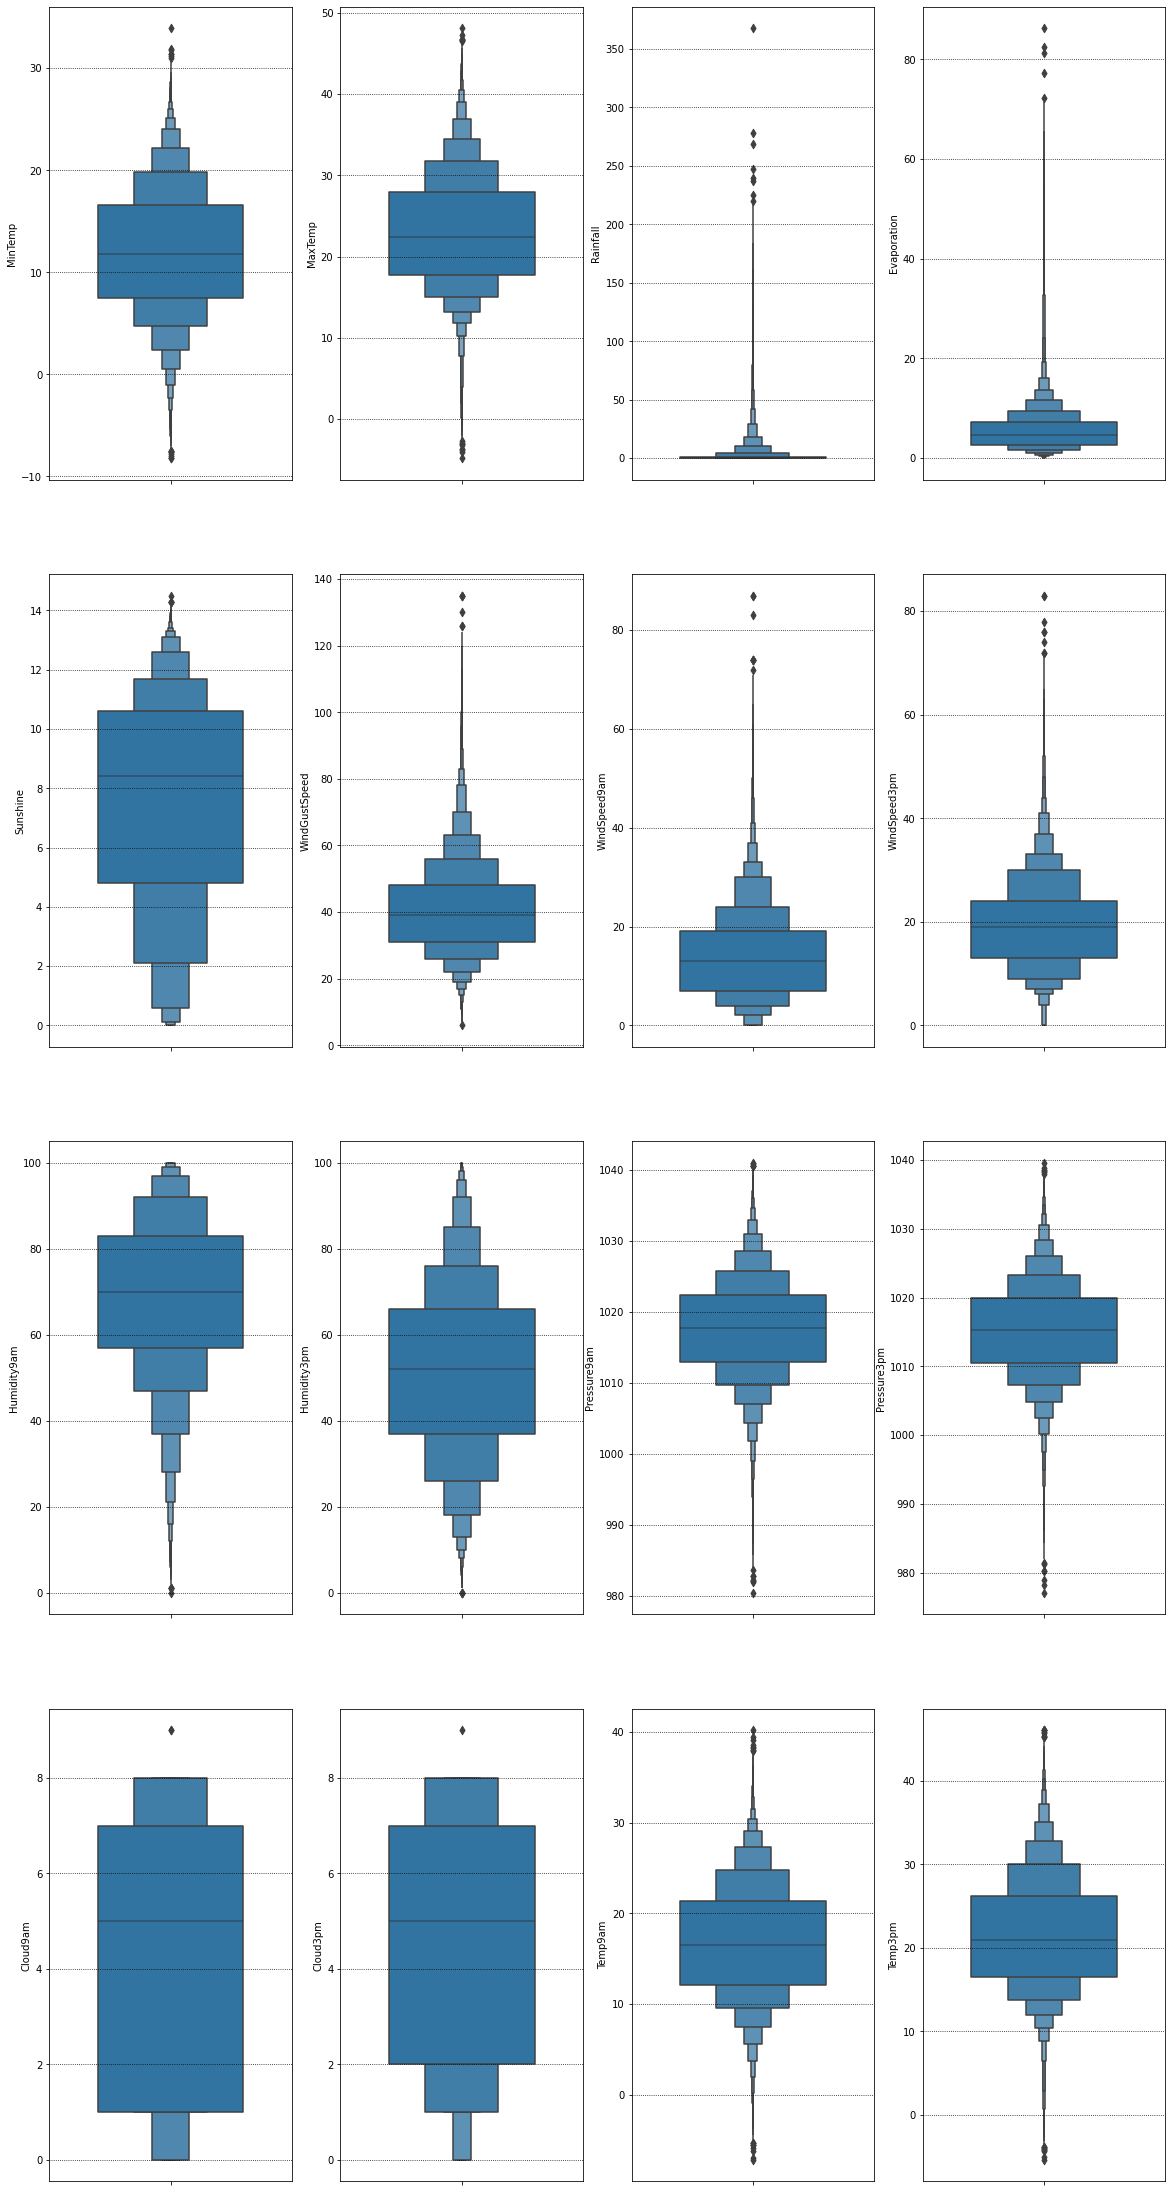

In [11]:
# We visualize numeric values to see Outliers values
fig = plt.figure(figsize=(20,40))
gr = fig.add_gridspec(4,4)

axxes = []
for i in range (0,4):
    for j in range (0,4):
        axxes.append(fig.add_subplot(gr[i,j]))
        
for i in range(0,len(numerical)):
    axxes[i].grid(color='#000000', linestyle=':', axis='y')
    sns.boxenplot(ax=axxes[i],y=train[numerical[i]],width=0.6)

**IQR**


We find outlier values using the IQR formula. We will subtract the values we find from the data.

![](https://muthu.co/wp-content/uploads/2021/01/mk.png)

In [12]:
# We calculate iqr values.
Q1 = train[numerical].quantile(0.25)
Q3 = train[numerical].quantile(0.75)
IQR = Q3 - Q1

print("IQR values for columns with numeric values\n",IQR)
# Dropping outlier values from train data.
old_train_shape = train.shape[0]
train = train[~((train[numerical] < (Q1 - 1.5 * IQR)) |(train[numerical] > (Q3 + 1.5 * IQR)))
              .any(axis=1)]

IQR values for columns with numeric values
 MinTemp           9.1
MaxTemp          10.2
Rainfall          0.8
Evaporation       4.6
Sunshine          5.8
WindGustSpeed    17.0
WindSpeed9am     12.0
WindSpeed3pm     11.0
Humidity9am      26.0
Humidity3pm      29.0
Pressure9am       9.4
Pressure3pm       9.5
Cloud9am          6.0
Cloud3pm          5.0
Temp9am           9.3
Temp3pm           9.7
dtype: float64


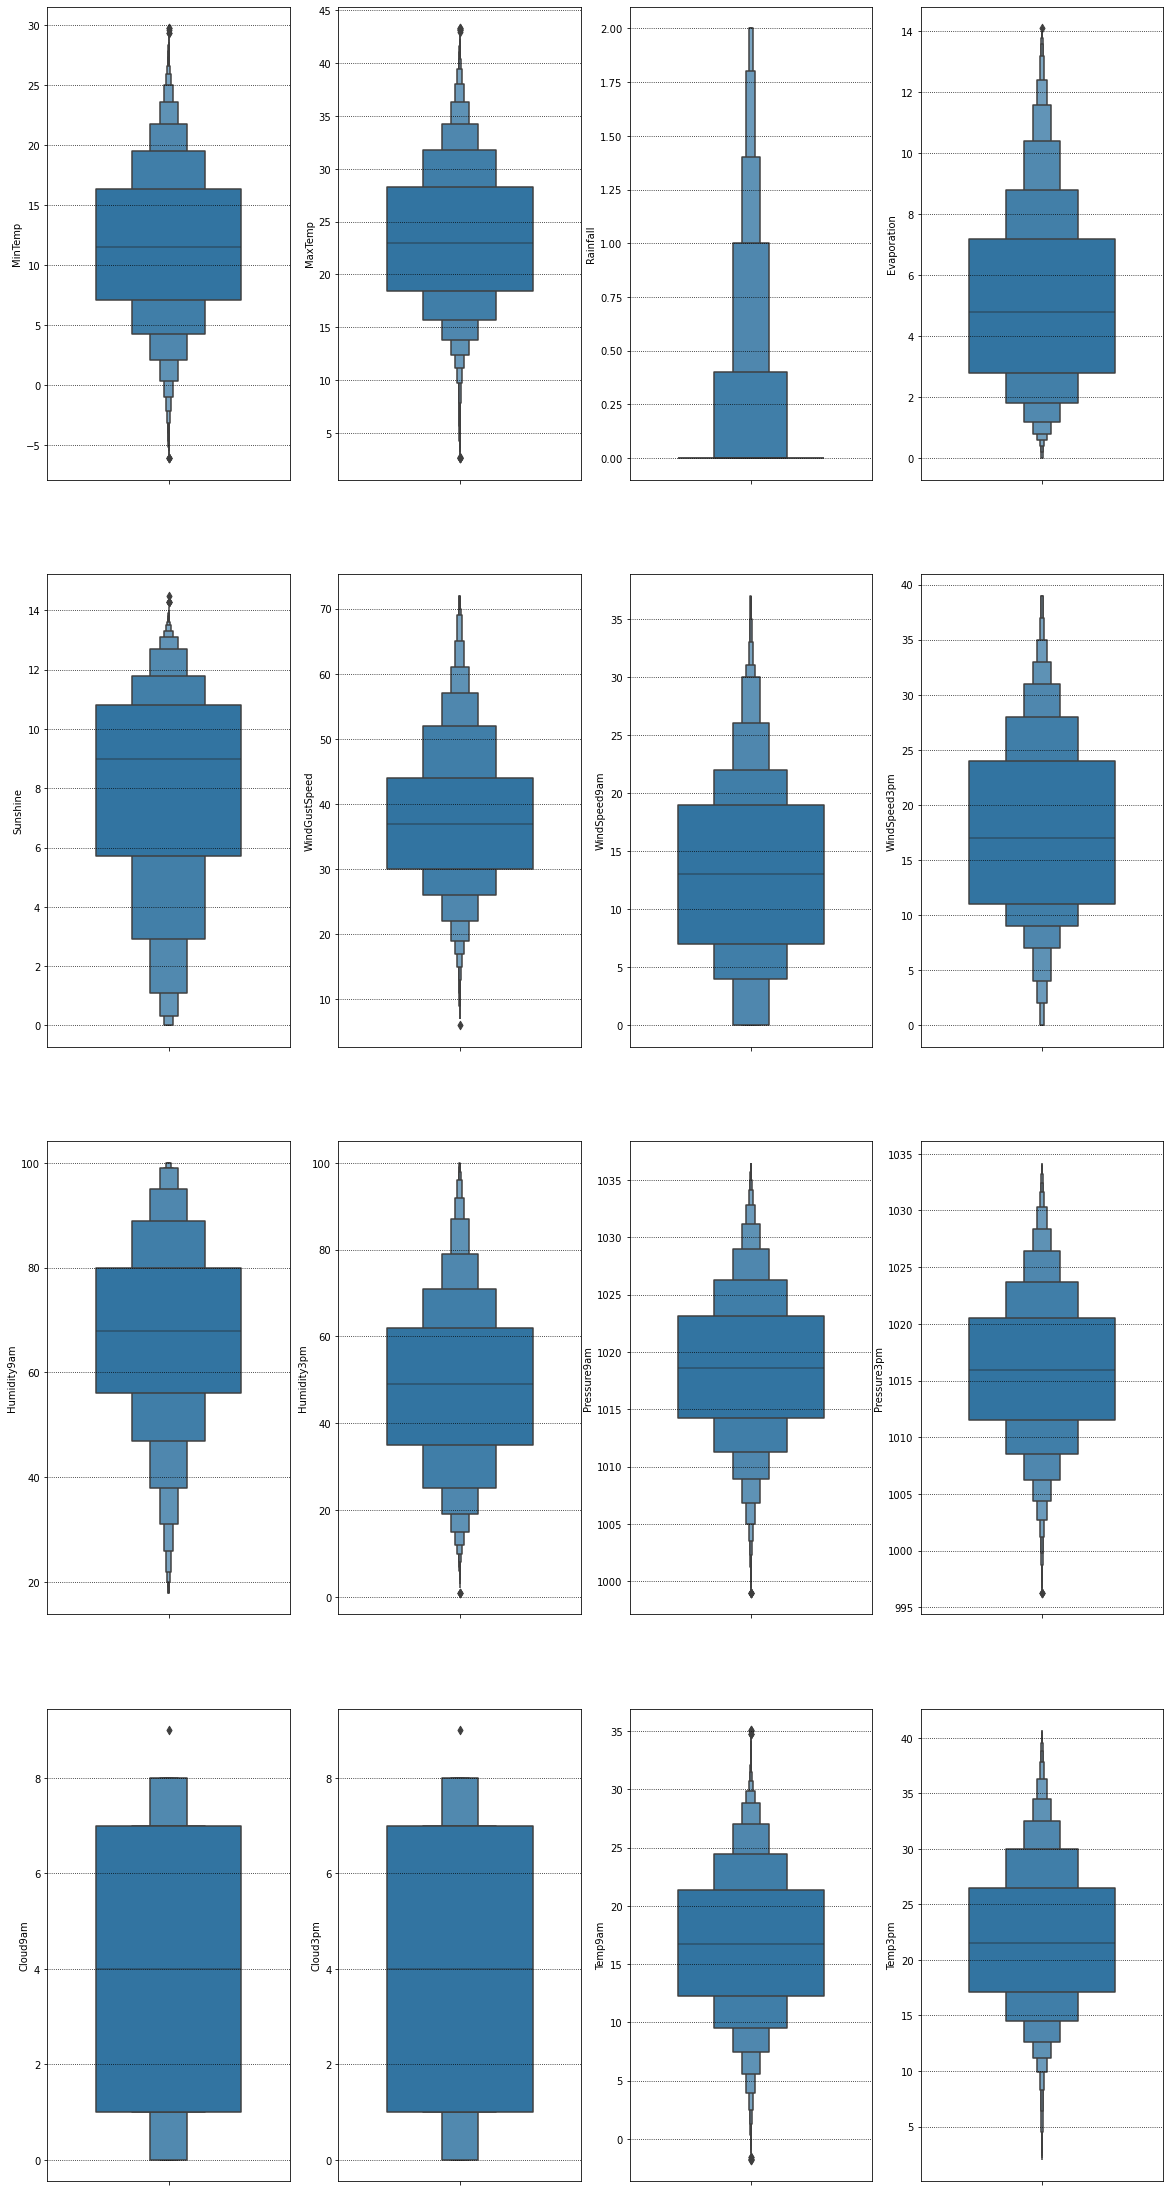

In [13]:
# Let's check again after performing the drop.

fig = plt.figure(figsize=(20,40))
gr = fig.add_gridspec(4,4)

axxes = []
for i in range (0,4):
    for j in range (0,4):
        axxes.append(fig.add_subplot(gr[i,j]))
        
for i in range(0,len(numerical)):
    axxes[i].grid(color='#000000', linestyle=':', axis='y')
    sns.boxenplot(ax=axxes[i],y=train[numerical[i]],width=0.6)

**Looks good now :)**

In [14]:
print("Total dropped outlier values =",old_train_shape - train.shape[0])

Total dropped outlier values = 28427


In [15]:
print("New shape of train data =",train.shape)

New shape of train data = (93446, 22)


In [16]:
nan = train[numerical].isnull().sum().sort_values()
print(nan) 

MaxTemp            899
MinTemp           1068
Temp9am           1231
WindSpeed9am      1278
Humidity9am       1746
WindSpeed3pm      1866
Temp3pm           2103
Rainfall          2524
Humidity3pm       2647
WindGustSpeed     6632
Pressure3pm       9911
Pressure9am       9950
Cloud9am         36570
Cloud3pm         38428
Evaporation      39313
Sunshine         43612
dtype: int64


**We fill in the numeric blank values with the average of that column and in order for the model to know the empty values, we create a new one with the _na of this column. In this column that we created, the empty value will be 1, the full value will be 0.**

In [17]:
for i in range(0,nan.shape[0]):
    train[nan.index[i]+"_na"] = np.where(train[numerical][nan.index[i]].isnull(), 1, 0)
    train[nan.index[i]].fillna(value= train[numerical][nan.index[i]].mean(), inplace = True)

In [18]:
train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Temp3pm_na,Rainfall_na,Humidity3pm_na,WindGustSpeed_na,Pressure3pm_na,Pressure9am_na,Cloud9am_na,Cloud3pm_na,Evaporation_na,Sunshine_na
0,Brisbane,13.7,23.6,0.0,5.000000,9.600000,SSE,24.0,SSW,ESE,...,0,0,0,0,0,0,0,0,0,0
2,Richmond,16.8,30.9,1.0,5.178449,8.073476,NE,35.0,NNW,NE,...,0,0,0,0,0,0,0,1,1,1
3,NorfolkIsland,13.9,17.1,0.2,3.800000,8.900000,SE,37.0,SE,SSE,...,0,0,0,0,0,0,0,0,0,0
4,Mildura,16.0,36.1,0.0,6.800000,12.900000,ENE,33.0,ENE,E,...,0,0,0,0,0,0,0,0,0,0
6,GoldCoast,11.9,24.5,0.0,5.178449,8.073476,NNE,31.0,SSE,E,...,0,0,0,0,0,0,1,1,1,1


In [19]:
train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

**We don't have any empty values anymore :D**

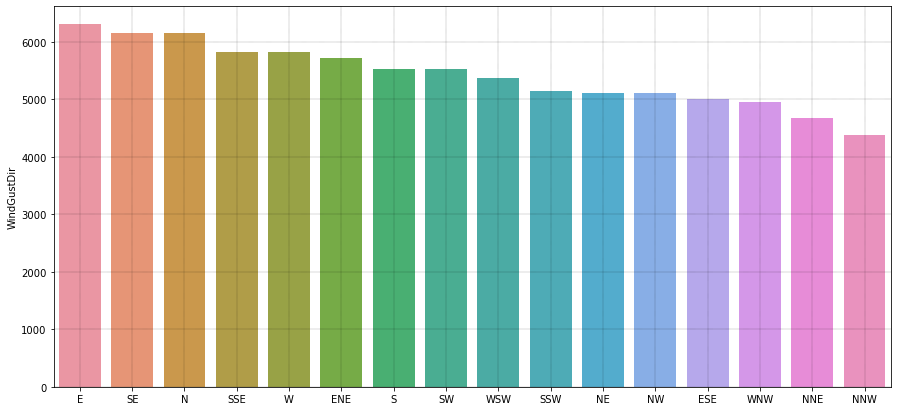

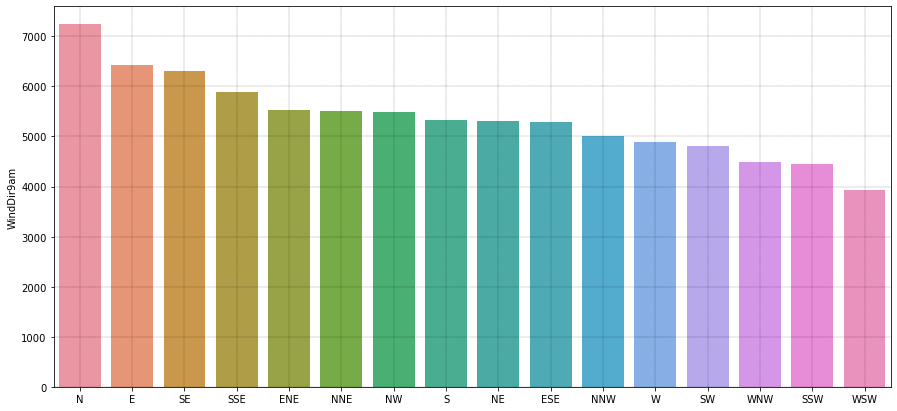

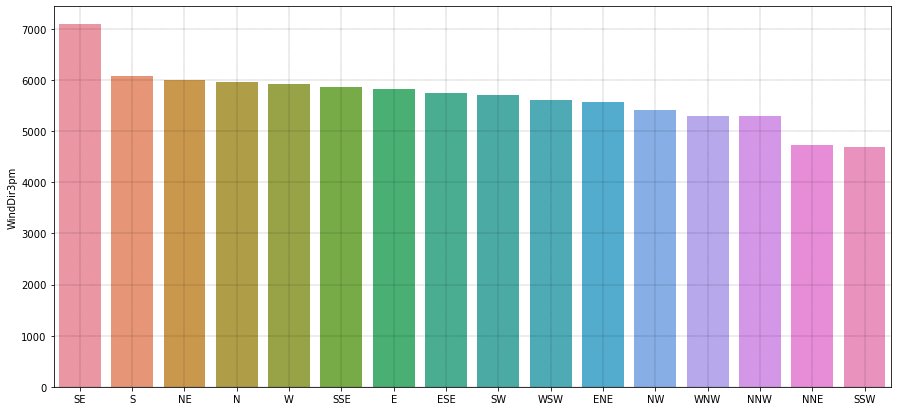

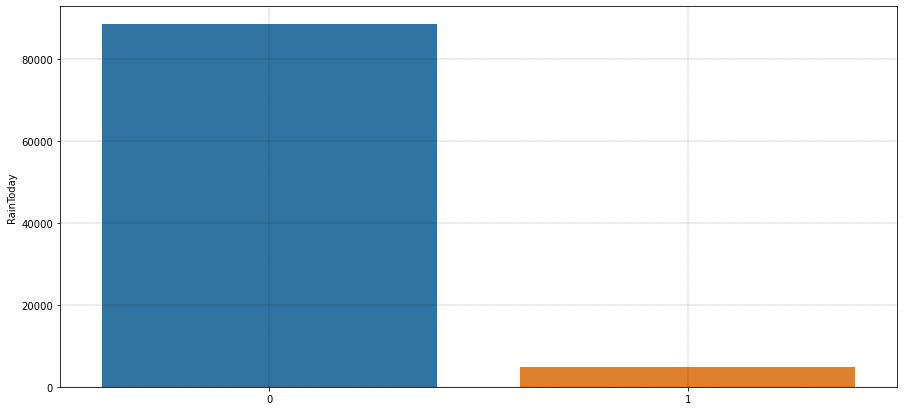

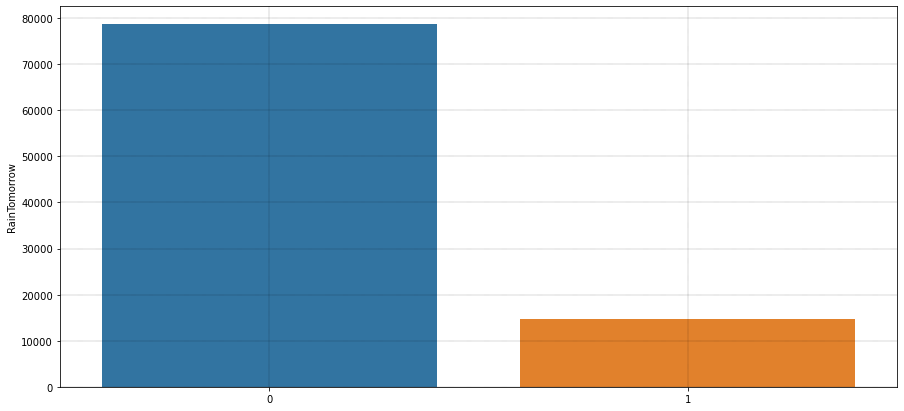

In [20]:
# We visualize the categorical values
for i in range (1 , len(categorical)):
    fig = plt.figure(figsize =(15, 7))
    sns.barplot(train[categorical[i]].value_counts().index , train[categorical[i]].value_counts())
    plt.grid(color='black', linestyle='--', linewidth=.2)
    plt.show() 

In [21]:
train.columns, train.shape

(Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
        'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
        'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
        'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
        'Temp3pm', 'RainToday', 'RainTomorrow', 'MaxTemp_na', 'MinTemp_na',
        'Temp9am_na', 'WindSpeed9am_na', 'Humidity9am_na', 'WindSpeed3pm_na',
        'Temp3pm_na', 'Rainfall_na', 'Humidity3pm_na', 'WindGustSpeed_na',
        'Pressure3pm_na', 'Pressure9am_na', 'Cloud9am_na', 'Cloud3pm_na',
        'Evaporation_na', 'Sunshine_na'],
       dtype='object'),
 (93446, 38))

In [22]:
# We are looking at how much empty value categorical columns have.
cat = train[ train.columns[ train.isnull().sum() != 0 ] ].isnull().sum().sort_values()
cat

WindDir3pm     2641
WindGustDir    6665
WindDir9am     7541
dtype: int64

**We will fill the empty categorical values with the 3 values that repeat the most. We will also do the work of creating a new column here.(colon_name+"_na")**

In [23]:
liste = []
for i in range(0,cat.shape[0]):
    value = train[cat.index[i]].value_counts().sort_values(ascending=False)
    liste.append(value.index[:3])
print(liste)

[Index(['SE', 'S', 'NE'], dtype='object'), Index(['E', 'SE', 'N'], dtype='object'), Index(['N', 'E', 'SE'], dtype='object')]


In [24]:
#So that there is no doubt in your mind.
print(liste)
for i in range(0,len(liste)):
    print("\n",i,". list")
    for j in range (0,10):
        print(random.choice(liste[i]))

[Index(['SE', 'S', 'NE'], dtype='object'), Index(['E', 'SE', 'N'], dtype='object'), Index(['N', 'E', 'SE'], dtype='object')]

 0 . list
S
S
S
S
NE
SE
S
S
NE
S

 1 . list
E
N
SE
N
SE
SE
N
SE
N
SE

 2 . list
E
E
N
N
E
E
E
N
SE
E


In [25]:
for i in range(0,cat.shape[0]):
    train[cat.index[i]+"_na"] = np.where(train[cat.index[i]].isnull(), 1, 0)
    train[cat.index[i]].fillna(value=random.choice(liste[i]) , inplace = True)

In [26]:
train.shape

(93446, 41)

In [27]:
train.isnull().sum()

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
MaxTemp_na          0
MinTemp_na          0
Temp9am_na          0
WindSpeed9am_na     0
Humidity9am_na      0
WindSpeed3pm_na     0
Temp3pm_na          0
Rainfall_na         0
Humidity3pm_na      0
WindGustSpeed_na    0
Pressure3pm_na      0
Pressure9am_na      0
Cloud9am_na         0
Cloud3pm_na         0
Evaporation_na      0
Sunshine_na         0
WindDir3pm_na       0
WindGustDir_na      0
WindDir9am_na       0
dtype: int64

**We don't have any null values now :+)**

In [28]:
train.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'MaxTemp_na', 'MinTemp_na',
       'Temp9am_na', 'WindSpeed9am_na', 'Humidity9am_na', 'WindSpeed3pm_na',
       'Temp3pm_na', 'Rainfall_na', 'Humidity3pm_na', 'WindGustSpeed_na',
       'Pressure3pm_na', 'Pressure9am_na', 'Cloud9am_na', 'Cloud3pm_na',
       'Evaporation_na', 'Sunshine_na', 'WindDir3pm_na', 'WindGustDir_na',
       'WindDir9am_na'],
      dtype='object')

In [29]:
# We apply categorical data to one hot encoding.
train= pd.get_dummies(train)
train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.7,23.6,0.0,5.000000,9.600000,24.0,7.0,9.0,65.0,53.0,...,0,0,0,0,0,0,0,0,0,0
2,16.8,30.9,1.0,5.178449,8.073476,35.0,7.0,26.0,80.0,38.0,...,0,0,0,0,0,0,0,0,0,0
3,13.9,17.1,0.2,3.800000,8.900000,37.0,17.0,20.0,56.0,63.0,...,0,0,0,0,1,0,0,0,0,0
4,16.0,36.1,0.0,6.800000,12.900000,33.0,17.0,19.0,58.0,32.0,...,0,0,0,0,0,0,0,0,0,0
6,11.9,24.5,0.0,5.178449,8.073476,31.0,20.0,20.0,42.0,56.0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93446 entries, 0 to 121872
Columns: 134 entries, MinTemp to WindDir3pm_WSW
dtypes: float64(16), int32(19), int64(2), uint8(97)
memory usage: 29.0 MB


In [31]:
Cname = train.columns
Cname

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE',
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW'],
      dtype='object', length=134)

In [32]:
# We normalize the data
scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train),columns=Cname)

In [33]:
y_train = pd.DataFrame(train["RainTomorrow"])
x_train = train.drop(["RainTomorrow"],axis=1)

# **Modelling**

In [34]:
parameters = {'criterion': ('gini', 'entropy'), 
              'max_depth': np.arange(0,20),
             }

model = DecisionTreeClassifier()
Gmodel = GridSearchCV(model, parameters, cv= 5)
Gmodel.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])})

In [35]:
print("Best Score =",Gmodel.best_score_)
print("Best params =",Gmodel.best_params_)

Best Score = 0.8665111527737924
Best params = {'criterion': 'gini', 'max_depth': 7}


# **Conclusion**

If there's something I'm missing or something you don't understand, please let me know. Share it with me if you have different thoughts.

**I tried to explain as much as I could. If you've come this far and liked this review, don't forget to hit the arrow in the upper right corner. We hope to see you in different reviews.**